In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from nuflux import detgeo
from nuflux import data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
mdb = data.get_particles("mutristan_small")

In [4]:
geom = "approximate_muon_detector_1"
Nmu = 2.89e19
iterations = 25
particle = 'both'
cc = detgeo.get_quantities(mdb)
cc.completely_circular()
sim, sim2 = detgeo.SimulateDetector(cc, Geometry = geom, Nmu = Nmu, iterations = iterations, particle = particle).run()

/home/luc/Research/BIN_MC/nuflux/detector_geometries/helpers.py:57: ComplexWarning: Casting complex values to real discards the imaginary part
  roots[i,:] = root# (indices size, 2) THIS MIGHT NOT ALWAYS have size two


4.63e+09 numu events
7.93e+09 nue events


In [5]:
sim = detgeo.SimulateDetector(cc, Geometry = geom, Nmu = 2.9e19, iterations = 25, particle = "nue").run()

7.95e+09 nue events


In [9]:
def plotallthings():
    T1 = [[-231, 231,231,28,-28,-231,-231], [150,150,24,3,3,24,150]]

    ECAL1=[[-231, -231, 231, 231, -231],[150, 170, 170, 150, 150]]
    ECAL2 = [[231, 231, 251, 251, 231],[24, 170, 170, 26, 24]]
    ECAL3 = [[-1 * i for i in ECAL2[0]], ECAL2[1]]

    HCAL1 = [[-251, -251, 251, 251, -251],[170, 348, 348, 170, 170]]
    HCAL2= [[251, 251, 418, 418,251, 251,251],[170, 348, 348, 43,26, 170,170]]
    HCAL3 = [[-1 * i for i in HCAL2[0]], HCAL2[1]]

    SOLENOID =[[-418, -418, 418, 418, -418],[348, 446, 446, 348, 348]]

    MD1 = [[-418, -418, 418, 418, -418],[446, 645, 645, 446, 446]]
    MD2 = [[418, 418, 564, 564, 418],[43, 645, 645, 58, 43]]
    MD3 = [[-1 * i for i in MD2[0]], MD2[1]]

    CONE1 = [[28,564,564,28],[3,58,3,3]]
    CONE2 = [[-1 * i for i in CONE1[0]], CONE1[1]]

    BL = [[-564, -564, 564, 564, -564], [-3, 3, 3, -3, -3]]

    dets = [T1, ECAL1, ECAL2, ECAL3, HCAL1, HCAL2, HCAL3,SOLENOID, MD1, MD2, MD3, CONE1, CONE2, BL]
    cols = ['lightgrey']*1 + ['dimgrey']*3 + ['grey']*3 + ['darkgrey'] + 3*['grey'] + ['black']*2 + ['white']
    plt.figure(figsize = (20,12))
    for i, det in enumerate(dets):
        plt.plot(det[0],det[1], color = cols[i])
        plt.fill_between(det[0], det[1], color = cols[i], alpha=0.7)
        new_y =[-1*k for k in det[1]]
        plt.plot(det[0], new_y, color = cols[i])
        plt.fill_between(det[0], new_y, color = cols[i], alpha=0.7)

    plt.plot([],[],color = 'black', label='Density: 19.28 g/cm**3 (W)')
    plt.plot([],[],color = 'dimgrey', label='Density: 9.3 g/cm**3 (W + Si)')
    plt.plot([],[],color = 'grey', label='Density: 7.874 g/cm**3 (Fe)')
    plt.plot([],[],color = 'darkgrey', label='Density: 2.7 g/cm**3 (Al)')
    plt.plot([],[],color = 'lightgrey', label='Density: 2.329 g/cm**3 (Si)')
    plt.plot([],[],color= 'white', label='Beamline Pipe')

    plt.xlabel("z-coordinate (cm)")
    plt.ylabel("r-coordinate (cm)")
    plt.legend(loc='lower right')

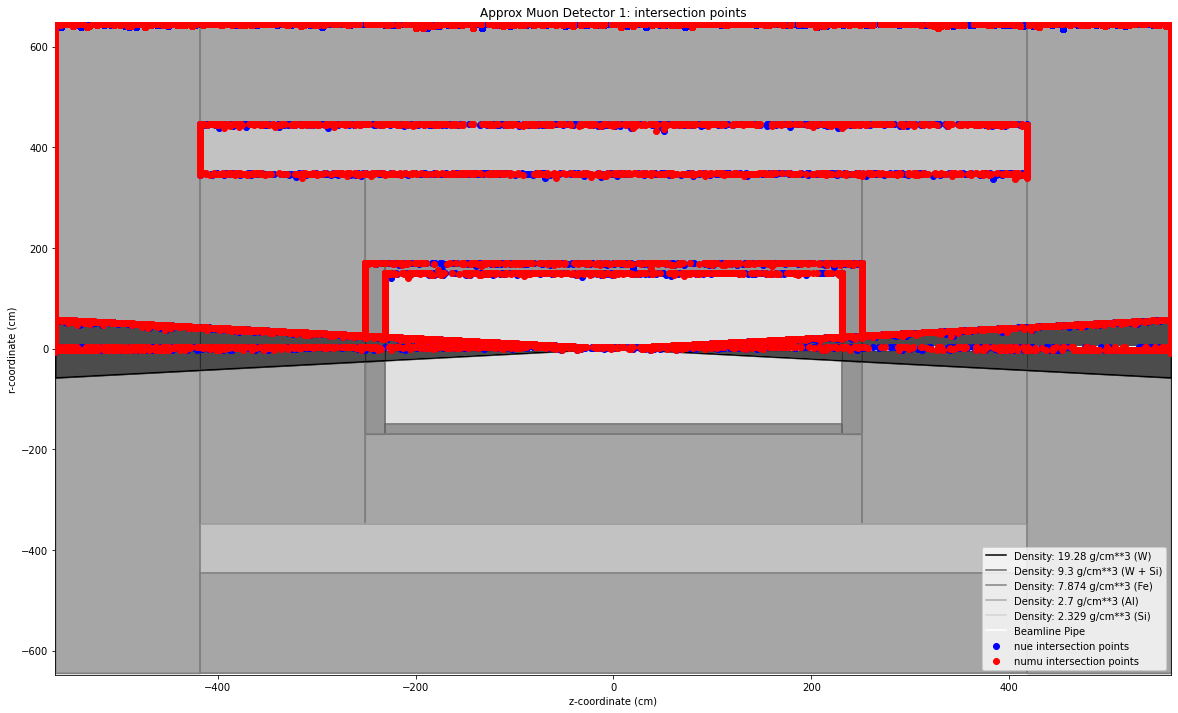

In [10]:
# intersection points?
plotallthings()
particle = -1
arr = sim.intersection_points[sim.mask]
arr2 = sim2.intersection_points[sim2.mask]
#plt.scatter(arr[particle, :,2], np.sqrt(arr[particle,:,1]**2 + arr[particle, :, 0]**2), alpha = 1, zorder = 10)

plt.scatter(arr[:, 1:,2], arr[:,1:,1], alpha = 1, zorder = 10, c = 'blue', label ='nue intersection points')
plt.scatter(arr2[:, 1:,2], arr2[:,1:,1], alpha = 1, zorder = 10,c ='red', label = 'numu intersection points')
plt.xlim(-564, right=564)
plt.ylim(-648, 648)
plt.legend(loc ='lower right')
plt.title("Approx Muon Detector 1: intersection points")
plt.savefig("plots_Luc/approx_detector_1_intersection_points.jpg", bbox_inches='tight', dpi=300)

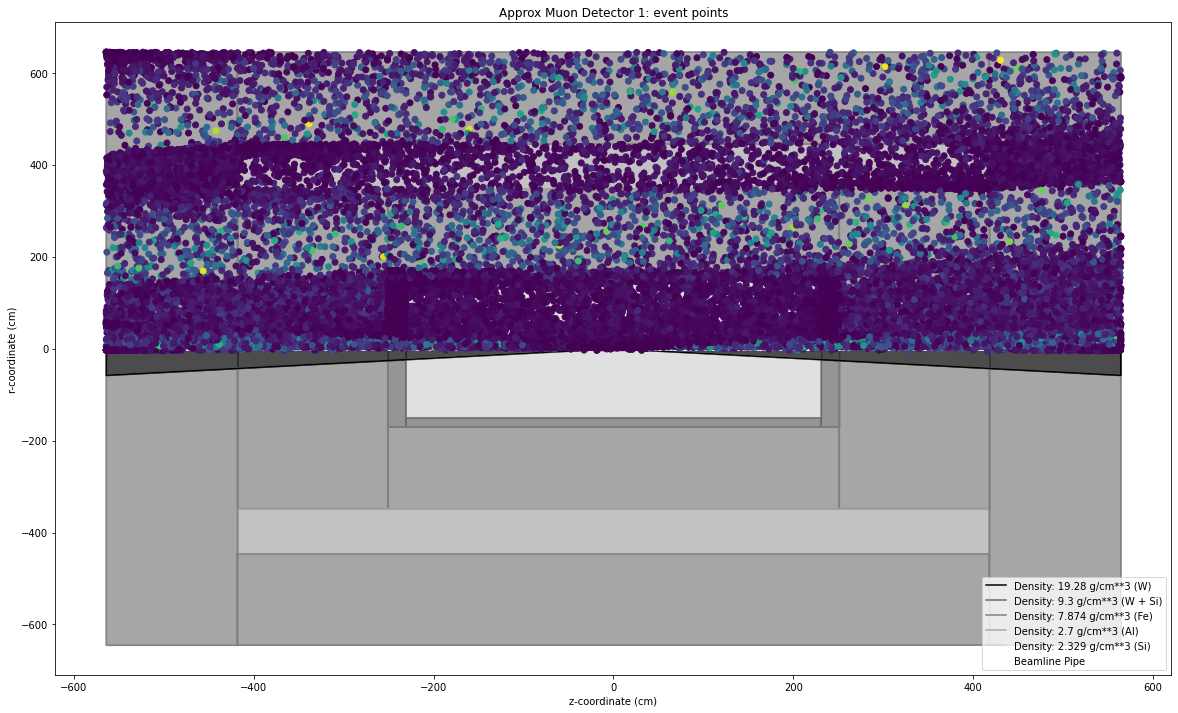

In [11]:
# event locations
plotallthings()
arr = sim.events_position[sim.mask]
arr2= sim2.events_position[sim2.mask]
mask = (sim.part_face_counts[sim.mask][:,:] > 0)
mask2 = (sim.part_face_counts[sim2.mask][:,:] > 0)
plt.scatter(arr[:, :,2][mask], arr[:,:,1][mask], alpha = 1, zorder = 10, c = sim.part_face_counts[sim.mask][:,:][mask])
plt.scatter(arr2[:, :,2][mask2], arr2[:,:,1][mask2], alpha = 1, zorder = 10, c = sim2.part_face_counts[sim2.mask][:,:][mask2])
plt.title("Approx Muon Detector 1: event points")
plt.savefig("plots_Luc/approx_detector_1_events.jpg", bbox_inches='tight', dpi=300)

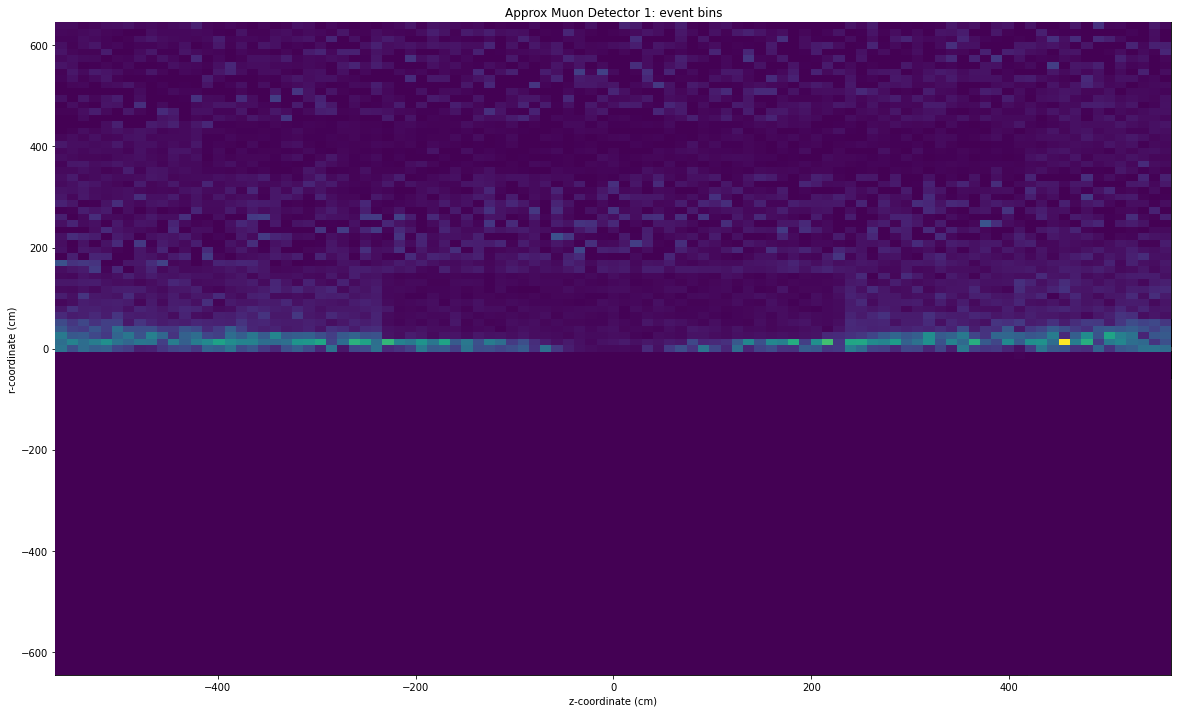

In [12]:
# densities approximated

plotallthings()

arr = sim.events_position[sim.mask]
arr2 = sim2.events_position[sim2.mask]

bs = np.linspace(-564, 564, 100)
bs2 = np.linspace(-645, 645, 100)

plt.hist2d(np.append(arr[:, :,2][mask].flatten(),arr2[:, :,2][mask2].flatten()), np.append(arr[:,:,1][mask].flatten(),arr2[:,:,1][mask2].flatten()), alpha = 1, zorder = 10, bins = (bs, bs2), weights = np.append(sim.part_face_counts[sim.mask][mask].flatten(),sim2.part_face_counts[sim2.mask][mask2].flatten()))


plt.title("Approx Muon Detector 1: event bins")
plt.savefig("plots_Luc/approx_detector_1_events_bins.jpg", bbox_inches='tight', dpi=300)

In [4]:
import numpy as np
3e3/2/np.pi * 8*545/26659

78.08794987216291